<a href="https://colab.research.google.com/github/mymooss/Tensorflow_practice/blob/main/2_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98%2C_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80%EC%99%80_Cross_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

**샘플 데이터 생성**

In [3]:
#점수에 따른 합격 가능성 예측을 위한 데이터
x = np.array([-50, -40, -35, -30, -25, -22, 10, 25, 30, 45], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=np.float32)

**케라스 모델 생성**

In [10]:
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1], activation='sigmoid')
])
#input이 1개 들어감 (가중치와 곱해져서)
#sigmoid는 결과가 1/1+exp(-(wx+b)) 형태

init_w, init_b = model.get_weights() #초기값
print(init_w[0])
print(init_b)

[-0.3322034]
[0.]


**데이터 시각화 (sigmoid)**

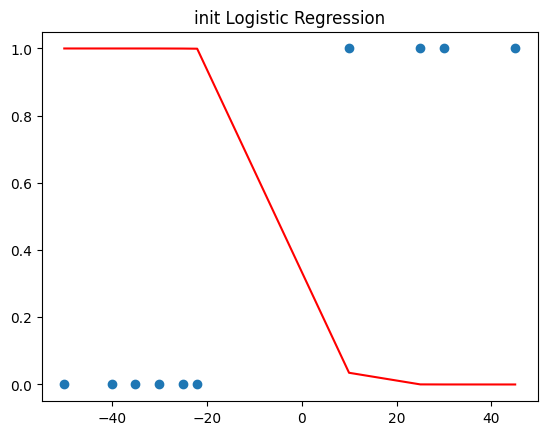

In [11]:
plt.scatter(x, y)

#k = np.linspace(-100, 100, 100)
z = 1/(1 + np.exp(-(init_w[0] * x +init_b)))
plt.plot(x, z, color = 'red')
plt.title('init Logistic Regression')
plt.show()

In [12]:
# 모델 컴파일 과정
sgd = keras.optimizers.SGD(learning_rate=0.01) # 경사하강법 learnig rate를 0.1로 설정하고
model.compile(optimizer=sgd, loss='binary_crossentropy') # BCE를 비용함수로 설정
#이진 분류를 하는 경우 cross entropy를 사용한다.(여러가지 오류문제로 인하여)
#BCE = binary cross entropy

# 학습
history = model.fit(x, y, epochs=30)#30번 반복 훈련

# 학습된 w, b
w, b = model.get_weights()

print(f"\n\n\n학습된 w: {w}, b: {b}\n\n\n")

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 10.3684
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 1.0706
Epoch 3/30
1/1 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 4/30
1/1 [==============================] - 0s 34ms/step - loss: 0.0178
Epoch 5/30
1/1 [==============================] - 0s 20ms/step - loss: 0.0173
Epoch 6/30
1/1 [==============================] - 0s 15ms/step - loss: 0.0168
Epoch 7/30
1/1 [==============================] - 0s 34ms/step - loss: 0.0163
Epoch 8/30
1/1 [==============================] - 0s 20ms/step - loss: 0.0159
Epoch 9/30
1/1 [==============================] - 0s 18ms/step - loss: 0.0155
Epoch 10/30
1/1 [==============================] - 0s 21ms/step - loss: 0.0151
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.0148
Epoch 12/30
1/1 [==============================] - 0s 37ms/step - loss: 0.0145
Epoch 13/30
1/1 [==============================] - 0s 18ms/step

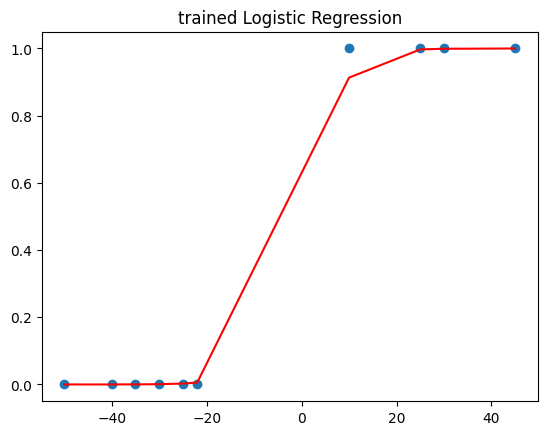

In [13]:
plt.scatter(x, y)

# k = np.linspace(-100, 100, 100)
z = 1 / (1 + np.exp(-(w[0] * x + b)))
plt.plot(x, z, color='red')
plt.title('trained Logistic Regression')
plt.show()

**모델을 활용해 새로운 데이터로 합격/불합격 확률을 예측**

In [14]:
x_new = np.array(
    [-50,-10, 5, 10, 20],
    dtype=np.float32
)

y_new = np.round(model.predict(x_new), 3) 

print(y_new)

1/1 [==============================] - 0s 89ms/step
[[0.   ]
 [0.087]
 [0.764]
 [0.913]
 [0.991]]
